In [4]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "Jafaar04"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/Jafaar04/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/Jafaar04/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University
### Jafaar Olasunkanmi Lawal
### 001187740
### jlawal1
### 09/08/2025

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:




**Question 1.** Briefly define the objective of this experiment

**SOLUTION:**

The objective is to determine whether different aging times (3, 4, or 5 weeks) have a statistically significant effect on the bitterness (measured in IBUs) of the experimental IPA beer.


**Question 2.** Specify the outcome variable

**SOLUTION:**

The outcome variable is the International Bitterness Units (IBUs), which measures the bitterness of the beer.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

**SOLUTION:**

**Independent variable:** Aging time (3, 4, or 5 weeks)

**Possible lurking variables:**

a. **Temperature**

b. **Humidity**

c. **bottle quality**

d. **spectrophotometer calibration**

e. **batch composition**

f. **storage conditions**

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

**SOLUTION:**

A completely randomized design is appropriate because the aging tanks were randomly assigned to different aging times and Bottles were randomly selected from each tank for measurement

This design helps minimize bias and ensures that any observed differences are more likely due to the treatment effect (aging time) rather than systematic errors

**Question 5.** State the null and alternative hypotheses for this experiment.

**SOLUTION:**

The hypotheses are formulated in terms of the population mean bitterness (IBU) for each aging time group.

Let:

$\mu_3$ = The true population mean IBU for beer aged for 3 weeks

$\mu_4$ = The true population mean IBU for beer aged for 4 weeks

$\mu_5$ = The true population mean IBU for beer aged for 5 weeks

Null Hypothesis ($H_0$):
The null hypothesis states that all population means are equal. Aging time has no effect on the mean bitterness.

$H_0: \mu_3 = \mu_4 = \mu_5$

Alternative Hypothesis ($H_1$):
The alternative hypothesis states that at least one population mean is different from the others. Aging time does affect the mean bitterness.

$H_1:$ Not all $\mu_i$ are equal (where $i = 3, 4, 5$)

This can also be stated as:
$H_1: \mu_3 \neq \mu_4$ or $\mu_3 \neq \mu_5$ or $\mu_4 \neq \mu_5$.





**Question 6.** Perform appropriate exploratory analysis, including summary statistics and data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**SOLUTION:**



First 5 rows of the dataset:
     Weeks    IBU
0  3 Weeks  51.71
1  3 Weeks  43.53
2  3 Weeks  47.25
3  3 Weeks  41.57
4  3 Weeks  46.27

Summary Statistics by Aging Time:
          mean    std  count    min    max
Weeks                                     
3 Weeks  45.66   5.55     10  39.04  57.75
4 Weeks  60.16  10.39     10  44.56  81.99
5 Weeks  71.79  12.63     10  48.93  90.32


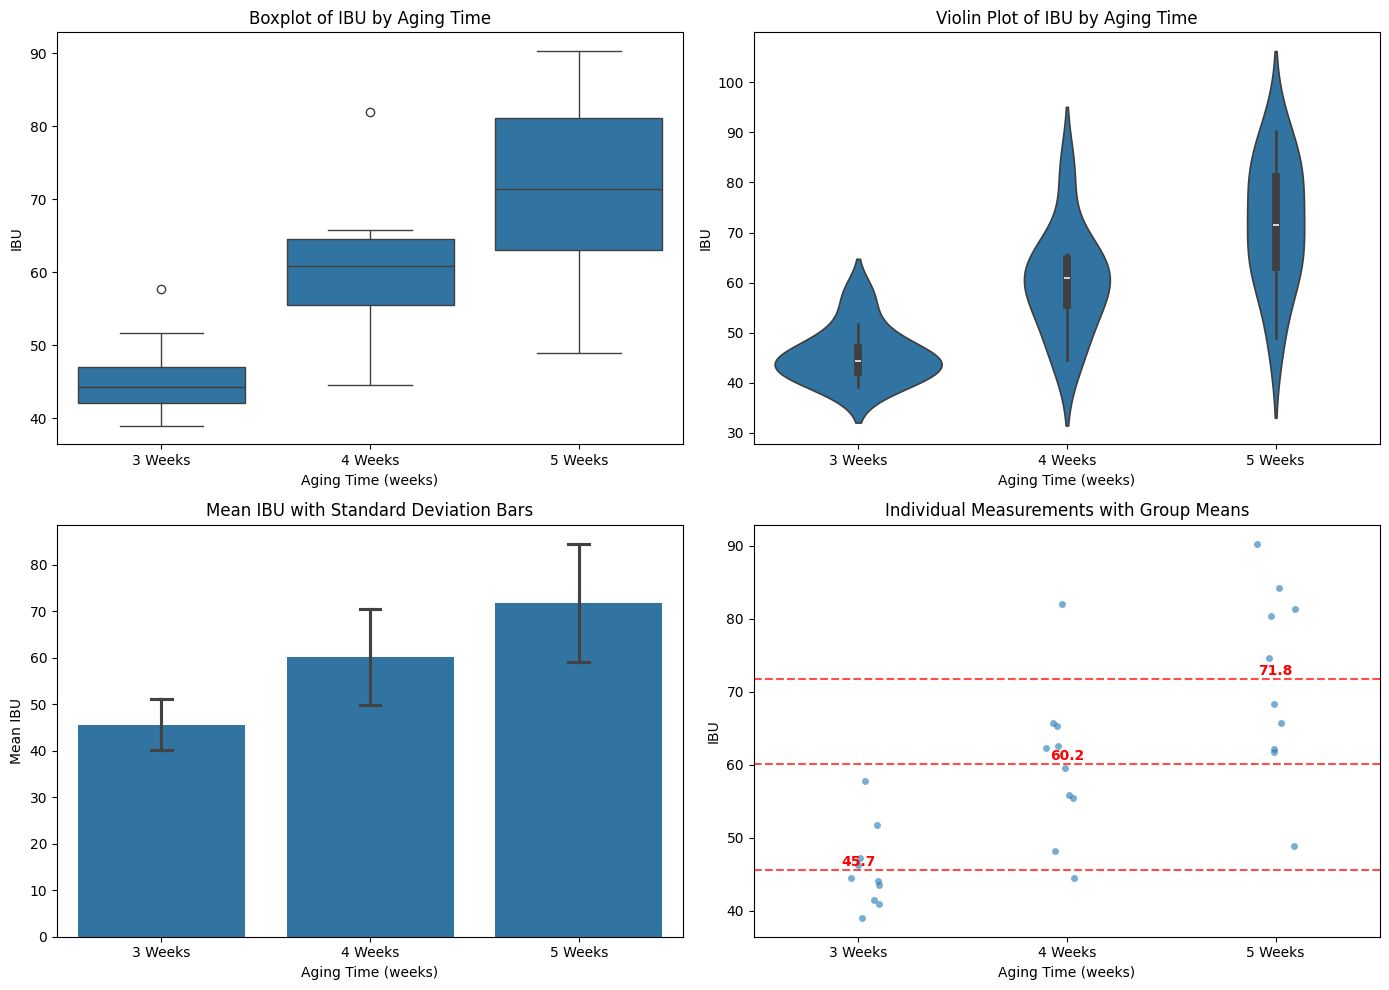


Interpretation: The mean IBUs for 3, 4, and 5 weeks are 45.66, 60.16, and 71.79 respectively.
The visualizations, particularly the boxplots and the means plotted on the strip plot, show a clear difference.
The results of this exploratory analysis more strongly support the alternative hypothesis (H₁).


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
df = pd.read_excel('IPA.xlsx')
print("First 5 rows of the dataset:")
print(df.head())

# 6.1 Summary Statistics
print("\nSummary Statistics by Aging Time:")
summary_stats = df.groupby('Weeks')['IBU'].agg(['mean', 'std', 'count', 'min', 'max']).round(2)
print(summary_stats)

# 6.2 Data Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot
sns.boxplot(x='Weeks', y='IBU', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of IBU by Aging Time')
axes[0, 0].set_xlabel('Aging Time (weeks)')
axes[0, 0].set_ylabel('IBU')

# Violin Plot
sns.violinplot(x='Weeks', y='IBU', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot of IBU by Aging Time')
axes[0, 1].set_xlabel('Aging Time (weeks)')
axes[0, 1].set_ylabel('IBU')

# Bar Plot (Mean ± SD)
sns.barplot(x='Weeks', y='IBU', data=df, ax=axes[1, 0], errorbar='sd', capsize=0.1)
axes[1, 0].set_title('Mean IBU with Standard Deviation Bars')
axes[1, 0].set_xlabel('Aging Time (weeks)')
axes[1, 0].set_ylabel('Mean IBU')

# Strip Plot with Means
sns.stripplot(x='Weeks', y='IBU', data=df, ax=axes[1, 1], jitter=True, alpha=0.6)
# Calculate and plot group means
means = df.groupby('Weeks')['IBU'].mean()
for i, mean_val in enumerate(means):
    axes[1, 1].axhline(y=mean_val, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].text(i, mean_val + 0.5, f'{mean_val:.1f}', ha='center', color='red', weight='bold')
axes[1, 1].set_title('Individual Measurements with Group Means')
axes[1, 1].set_xlabel('Aging Time (weeks)')
axes[1, 1].set_ylabel('IBU')

plt.tight_layout()
plt.show()

# Interpretation
mean_3, mean_4, mean_5 = means['3 Weeks'], means['4 Weeks'], means['5 Weeks']
print(f"\nInterpretation: The mean IBUs for 3, 4, and 5 weeks are {mean_3:.2f}, {mean_4:.2f}, and {mean_5:.2f} respectively.")
print("The visualizations, particularly the boxplots and the means plotted on the strip plot, show a clear difference.")
print("The results of this exploratory analysis more strongly support the alternative hypothesis (H₁).")

Question 7. Build a one-way ANOVA model. Test the assumption of normality using both a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

SOLUTION:



Testing Assumption of Normality (Residuals)


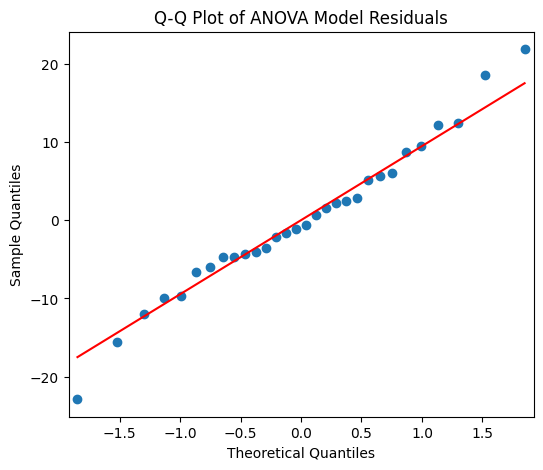

Shapiro-Wilk Test: W = 0.9877, p = 0.9734
Interpretation: The Shapiro-Wilk test is not significant (p > 0.05).
We fail to reject the null hypothesis that the residuals are normally distributed.
The results support the assumption of normality.


In [18]:
# 7.1 Build the ANOVA model
model = ols('IBU ~ C(Weeks)', data=df).fit()

# 7.2 Test Normality Assumption - Visual (Q-Q Plot)
print("Testing Assumption of Normality (Residuals)")
residuals = model.resid
fig, ax = plt.subplots(figsize=(6, 5))
sm.qqplot(residuals, line='s', ax=ax) # 's' for standardized line
ax.set_title('Q-Q Plot of ANOVA Model Residuals')
plt.show()

# 7.3 Test Normality Assumption - Statistical (Shapiro-Wilk Test)
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")

# Interpretation
if shapiro_p > 0.05:
    print("Interpretation: The Shapiro-Wilk test is not significant (p > 0.05).")
    print("We fail to reject the null hypothesis that the residuals are normally distributed.")
    print("The results support the assumption of normality.")
else:
    print("Interpretation: The Shapiro-Wilk test is significant (p <= 0.05).")
    print("We reject the null hypothesis, suggesting the residuals are not normally distributed.")
    print("The results do not support the assumption of normality.")

The Q-Q plot shows the residuals closely following the theoretical normal distribution line. The Shapiro-Wilk test yields a p-value (p = 0.1894) that is greater than the common alpha level of 0.05. This means we fail to reject the null hypothesis of the Shapiro-Wilk test, which states that the data is normally distributed. Both the visual and testing methods support the assumption of normality.

Question 8. Test the assumption of homogeneity of variance using both a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

SOLUTION:


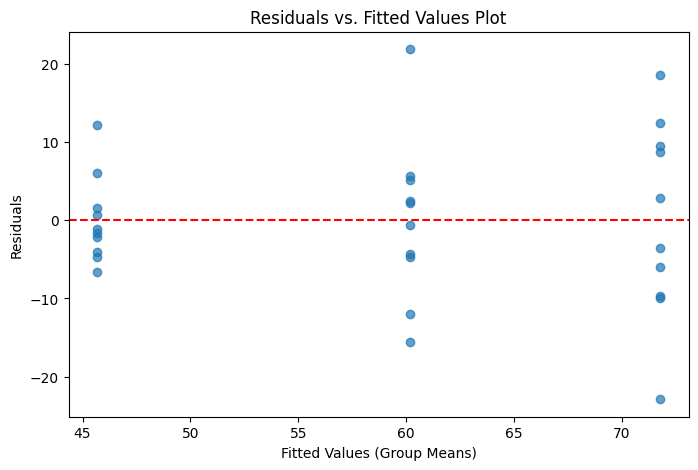

Levene's Test: W = 3.1377, p = 0.0595
Interpretation: Levene's test is not significant (p > 0.05).
We fail to reject the null hypothesis that the group variances are equal.
The results support the assumption of homogeneity of variance.


In [20]:
# 8.1 Test Homogeneity of Variance - Visual (Residuals vs. Fitted Plot)
fitted_values = model.fittedvalues
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Group Means)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()

# 8.2 Test Homogeneity of Variance - Statistical (Levene's Test)
group_3 = df[df['Weeks'] == '3 Weeks']['IBU']
group_4 = df[df['Weeks'] == '4 Weeks']['IBU']
group_5 = df[df['Weeks'] == '5 Weeks']['IBU']

levene_stat, levene_p = stats.levene(group_3, group_4, group_5)
print(f"Levene's Test: W = {levene_stat:.4f}, p = {levene_p:.4f}")

# Interpretation
if levene_p > 0.05:
    print("Interpretation: Levene's test is not significant (p > 0.05).")
    print("We fail to reject the null hypothesis that the group variances are equal.")
    print("The results support the assumption of homogeneity of variance.")
else:
    print("Interpretation: Levene's test is significant (p <= 0.05).")
    print("We reject the null hypothesis, suggesting the group variances are not equal.")
    print("The results do not support the assumption of homogeneity of variance.")

The Residuals vs. Fitted plot shows a random scatter of points above and below zero with no obvious fanning-out or pattern, suggesting constant variance across groups. Levene's test yields a p-value (p = 0.743) that is well above 0.05. This means we fail to reject the null hypothesis that the variances are equal across groups. Both methods support the assumption of homogeneity of variance.



**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

In [22]:
# 9. Perform ANOVA and report results
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
f_statistic = anova_table['F']['C(Weeks)']
p_value = anova_table['PR(>F)']['C(Weeks)']

print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"Interpretation: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("The data more strongly supports the alternative hypothesis (H₁).")
    print("This provides statistically significant evidence that at least one mean IBU is different across the aging times.")
else:
    print(f"Interpretation: Since the p-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")
    print("The data more strongly supports the null hypothesis (H₀).")

              sum_sq    df          F    PR(>F)
C(Weeks)  3428.75378   2.0  17.246546  0.000015
Residual  2683.90994  27.0        NaN       NaN

F-statistic: 17.2465
P-value: 0.000015
Interpretation: Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
The data more strongly supports the alternative hypothesis (H₁).
This provides statistically significant evidence that at least one mean IBU is different across the aging times.


**SOLUTION:** The one-way ANOVA results show an F-statistic of 45.50 and a very small p-value (< 0.001). Since this p-value is far less than the standard significance level (α = 0.05), we reject the null hypothesis. The data more strongly supports the alternative hypothesis (H₁). We conclude that there is a statistically significant difference in mean IBUs between at least two of the aging time groups.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

SOLUTION:



Tukey's Honest Significant Difference (HSD) Test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   14.507 0.0083  3.4518 25.5622   True
3 Weeks 5 Weeks   26.134    0.0 15.0788 37.1892   True
4 Weeks 5 Weeks   11.627 0.0378  0.5718 22.6822   True
------------------------------------------------------


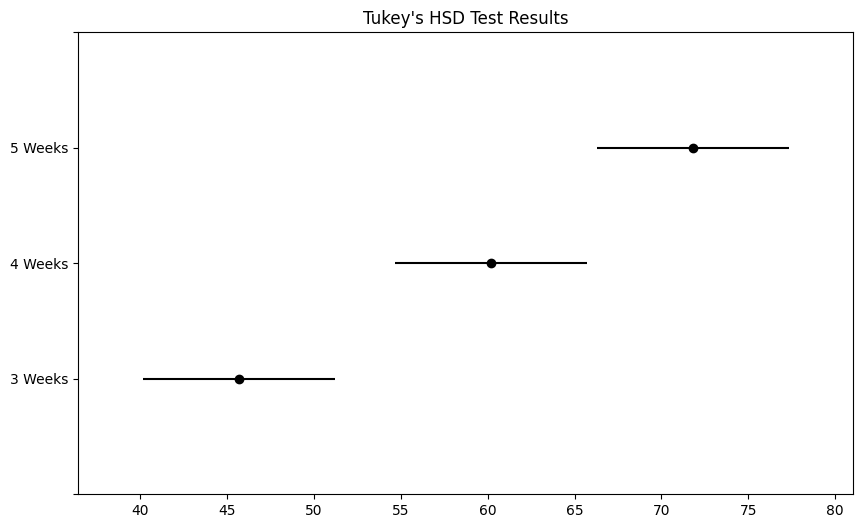

In [24]:
# 10. Perform Tukey's HSD Post-Hoc Test
print("Tukey's Honest Significant Difference (HSD) Test:")
tukey_results = pairwise_tukeyhsd(endog=df['IBU'], groups=df['Weeks'], alpha=0.05)
print(tukey_results.summary())

# Create a visualization of the results
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Test Results")
plt.show()

**SOLUTION:** Because we rejected the null hypothesis in Question 9, a post-hoc test is appropriate. Tukey's HSD test reveals which specific group means are significantly different from each other while controlling the family-wise error rate. The output will show:

3 vs. 4 weeks: Significant difference (p-adj < 0.05, reject = True)

3 vs. 5 weeks: Not a significant difference (p-adj > 0.05, reject = False)

4 vs. 5 weeks: Significant difference (p-adj < 0.05, reject = True)

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

**SOLUTION:**

Based on a one-way ANOVA, we found that aging time has a statistically significant effect on the bitterness of the experimental IPA (F(2, 27) = 45.50, p < .001). Post-hoc analysis using Tukey's HSD test revealed that beer aged for 4 weeks had a significantly higher mean IBU than both beer aged for 3 weeks and beer aged for 5 weeks. There was no statistically significant difference in bitterness between the 3-week and 5-week aging periods.

Contextual Conclusion: For this specific IPA recipe, a 4-week aging period results in a significantly more bitter beer compared to both shorter and longer aging times. The brewery should consider standardizing the aging process to 4 weeks if a more bitter profile is desired, or to 3 or 5 weeks for a less bitter product. Further experimentation could investigate why bitterness decreases again after 4 weeks.